In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns

In [5]:
df=pd.read_csv('titanic_train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df['Cabin'].count()

204

In [8]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


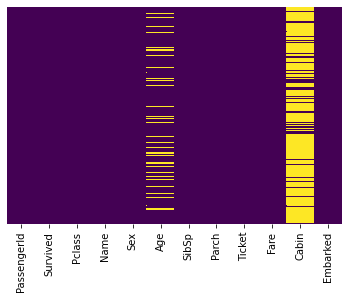

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
df.drop(['Cabin'],axis=1,inplace=True)

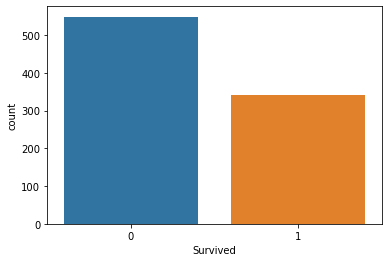

In [18]:
sns.countplot(x='Survived',data=df)

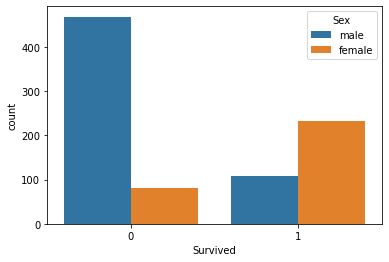

In [20]:
sns.countplot(x='Survived',data=df,hue='Sex')

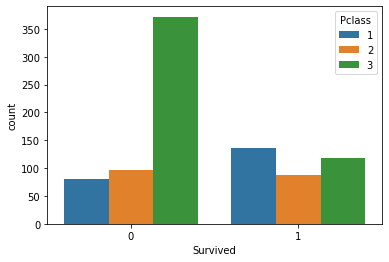

In [21]:
sns.countplot(x='Survived',data=df,hue='Pclass')

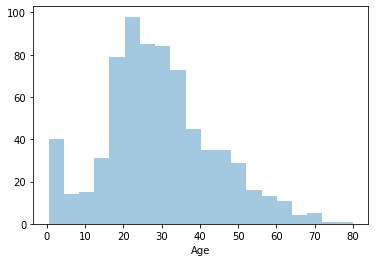

In [24]:
sns.distplot(df['Age'].dropna(),kde=False)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


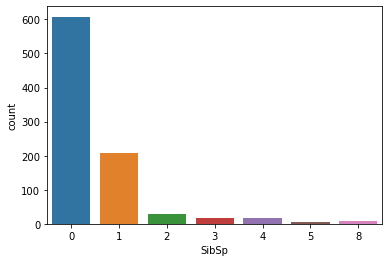

In [29]:
sns.countplot(x='SibSp',data=df)

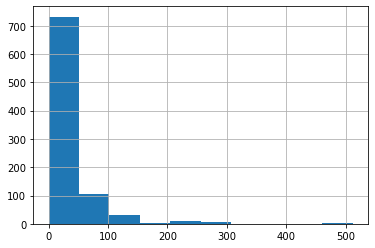

In [31]:
df['Fare'].hist()

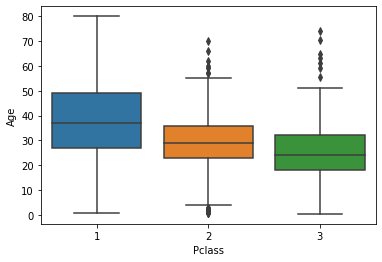

In [33]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [38]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        elif Pclass==3:
            return 24
        
    else:
        return Age

In [39]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

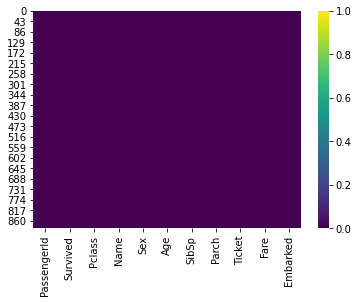

In [44]:
sns.heatmap(df.isnull(),cmap='viridis')

In [47]:
df.isnull().nunique()

PassengerId    1
Survived       1
Pclass         1
Name           1
Sex            1
Age            1
SibSp          1
Parch          1
Ticket         1
Fare           1
Embarked       2
dtype: int64

In [49]:
df.dropna(inplace=True)

In [56]:
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [59]:
embark=pd.get_dummies(df['Embarked'],drop_first=True)

In [61]:
df=pd.concat([df,sex,embark],axis=1)

In [62]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


In [63]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [65]:
df.drop(['PassengerId'],axis=1,inplace=True)

In [66]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x=df.drop(['S'],axis=1)

In [69]:
y=df['S']

In [70]:
x

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q
0,0,3,22.0,1,0,7.2500,1,0
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,0
3,1,1,35.0,1,0,53.1000,0,0
4,0,3,35.0,0,0,8.0500,1,0
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0
887,1,1,19.0,0,0,30.0000,0,0
888,0,3,24.0,1,2,23.4500,0,0
889,1,1,26.0,0,0,30.0000,1,0


In [71]:
y

0      1
1      0
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    0
890    0
Name: S, Length: 889, dtype: uint8

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
lg=LogisticRegression(max_iter=1000)

In [89]:
lg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [90]:
prediction=lg.predict(x_test)

In [95]:
from sklearn.metrics import classification_report,confusion_matrix

In [94]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.88      0.47      0.61        79
           1       0.81      0.97      0.89       188

    accuracy                           0.82       267
   macro avg       0.85      0.72      0.75       267
weighted avg       0.83      0.82      0.80       267



In [96]:
confusion_matrix(y_test,prediction)

array([[ 37,  42],
       [  5, 183]], dtype=int64)